In [52]:
import pandas as pd
data=pd.read_csv("exams.csv")
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

In [53]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [54]:
data["race/ethnicity"]

0      group D
1      group D
2      group D
3      group B
4      group D
        ...   
995    group C
996    group C
997    group A
998    group E
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

In [55]:
count_group=data["race/ethnicity"].value_counts()
print(count_group)

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64


In [56]:
x_bar=count_group.index
x_bar


Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race/ethnicity')

In [57]:
y_bar=count_group.values
y_bar

array([323, 257, 198, 143,  79])

Text(0, 0.5, 'number of group')

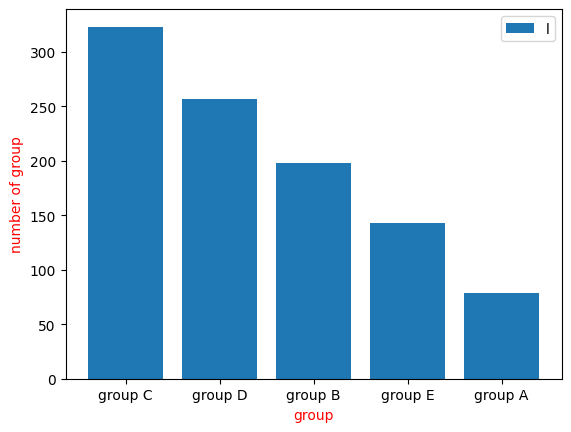

In [58]:
import matplotlib.pyplot as plt
plt.bar(x_bar,y_bar)
plt.legend("lower left")
plt.xlabel("group",color="red")
plt.ylabel("number of group",color="red")

In [59]:
student_score=data[["math score","reading score","writing score"]]
print(student_score)
total=student_score.sum(axis=0)
total



     math score  reading score  writing score
0            59             70             78
1            96             93             87
2            57             76             77
3            70             70             63
4            83             85             86
..          ...            ...            ...
995          77             77             71
996          80             66             66
997          67             86             86
998          80             72             62
999          58             47             45

[1000 rows x 3 columns]


math score       67810
reading score    70382
writing score    69140
dtype: int64

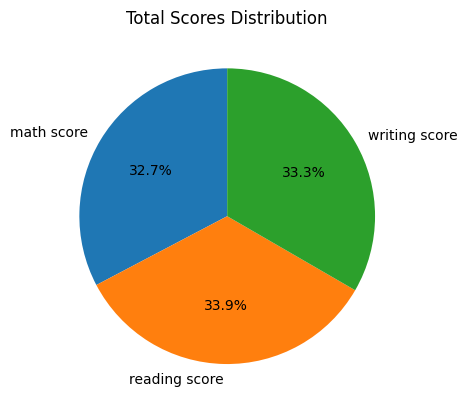

In [60]:
plt.pie(total, labels=total.index, startangle=90, autopct="%1.1f%%")
plt.title("Total Scores Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
dataset=data.copy()
encoder=LabelEncoder()
dataset["Gender_encode"] = encoder.fit_transform(dataset["gender"])
dataset["race_encode"] = encoder.fit_transform(dataset["race/ethnicity"])
dataset["lunch_encode"] = encoder.fit_transform(dataset["lunch"])
dataset["test_encode"] = encoder.fit_transform(dataset["test preparation course"])
dataset.to_csv("encoded_dataset.csv", index=False)
print("Encoded dataset saved successfully as 'encoded_dataset.csv'")


Encoded dataset saved successfully as 'encoded_dataset.csv'


In [82]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X= dataset[["reading score", "writing score", "Gender_encode", "lunch_encode", "test_encode","race_encode"]]
y=dataset["math score"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print("StandardScaler is:")
print(X_scaled)

print("-------------------------------")
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
print("MinMaxScaler is:")
print(X_scaled)


StandardScaler is:
[[-0.02709151  0.58994292 -1.01613007  0.71774056 -1.38093329  0.71085583]
 [ 1.60407283  1.18920774  0.98412598  0.71774056  0.72414794  0.71085583]
 [ 0.39842962  0.52335794 -1.01613007 -1.39326109  0.72414794  0.71085583]
 ...
 [ 1.10763151  1.12262276 -1.01613007  0.71774056 -1.38093329 -1.9122284 ]
 [ 0.11474887 -0.47541676  0.98412598  0.71774056  0.72414794  1.58521724]
 [-1.65825585 -1.60736142  0.98412598  0.71774056  0.72414794  0.71085583]]
-------------------------------
MinMaxScaler is:
[[0.6        0.74117647 0.         1.         0.         0.75      ]
 [0.90666667 0.84705882 1.         1.         1.         0.75      ]
 [0.68       0.72941176 0.         0.         1.         0.75      ]
 ...
 [0.81333333 0.83529412 0.         1.         0.         0.        ]
 [0.62666667 0.55294118 1.         1.         1.         1.        ]
 [0.29333333 0.35294118 1.         1.         1.         0.75      ]]


In [ ]:
from sklearn.model_selection import train_test_split
X= dataset[["reading score", "writing score", "Gender_encode", "lunch_encode", "test_encode","race_encode"]]
y=dataset["math score"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (800, 5)
X_test shape: (200, 5)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X= dataset[["reading score", "writing score", "Gender_encode", "lunch_encode", "test_encode","race_encode"]]
y=dataset["math score"]
model.fit(X,y)
reading_score=int(input("Enter reading score: "))
writing_score=int(input("Enter writing score: "))
Gender=int(input("enter the gender"))
lunch_encode=int(input("enter the lunch"))
test_encode=int(input("enter the test preparation course"))
race_encode=int(input("enter the race/ethnicity"))
predicted_score=model.predict([[reading_score,writing_score,Gender,lunch_encode,test_encode,race_encode]])
print("Predicted math score:",predicted_score)


Predicted math score: [91.73977526]


c:\Users\Nitin Suthar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
y_pred=model.predict(X)
mae=mean_absolute_error(y,y_pred)
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)
print("R-squared (R2):",r2)
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("Model Accuracy (approx):", round(r2 * 100, 2), "%")

R-squared (R2): 0.8691304895169789
Mean Absolute Error (MAE): 4.446724650372975
Mean Squared Error (MSE): 30.40568550063215
Root Mean Squared Error (RMSE): 5.514135063691508
Model Accuracy (approx): 86.91 %


In [93]:
import joblib
joblib.dump(model, "math_score_model.joblib")
print("Model saved successfully as 'math_score_model.joblib'")


Model saved successfully as 'math_score_model.joblib'
